[Medium Article for Fine Tuning CLIP](https://medium.com/aimonks/a-guide-to-fine-tuning-clip-models-with-custom-data-6c7c0d1416fb)

https://www.labellerr.com/blog/performance-of-clip-over-food-classification-dataset-here-are-the-findings/


In [1]:
import torch

print(torch.__version__)

2.1.0+cu118


In [2]:
pip install ftfy regex tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.8 MB/s eta 0:00:00


In [3]:
pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-lfikb09o
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-lfikb09o
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369500 sha256=f7c391e1382eaec2ed265d0de68124875344826eab68e27f73c14cdfe14d2deb
  Stored in directory: /tmp/pip-ephem-wheel-cache-6otpp8db/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [4]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.3 MB/s eta 0:00:00


In [5]:
import os
import clip
import torch
import matplotlib.pyplot as plt


In [7]:


# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)


# Download the dataset
from torchvision.datasets import Food101
data = Food101(root=os.path.expanduser("~/.cache"), download=True, split = 'train')




# o fpics:  75750

Top predictions:

         churros: 97.85%
  fried_calamari: 1.94%


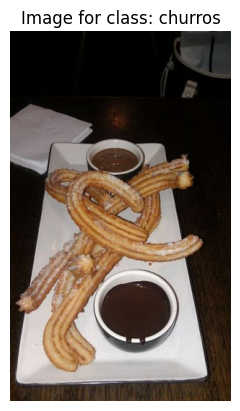

In [15]:
# Prepare the inputs
image, class_id = data[13]
print("# of pics: ",len(data))
image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in data.classes]).to(device)


# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)


# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(2)


# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{data.classes[index]:>16s}: {100 * value.item():.2f}%")

plt.imshow(image)
plt.title(f"Image for class: {data.classes[class_id]}")
plt.axis('off')
plt.show()